## 0. An end-to-end Scikit-Learn workflow

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#1 get Data ready
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#create X (features matrix)
#drop target variable
X = heart_disease.drop("target", axis = 1)
#assign y to target variable
y = heart_disease["target"]

In [3]:
#2 - choose right model & hyperparameters (what you can tune to improve model)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


#keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3. Fit model to training Data
from sklearn.model_selection import train_test_split

#assigning X&Y Training & Test data. Splitting at size of 80% of data will be training, 20% will be test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train);
#by default gives you a warning on "n_estimators" if you don't update it to n=100

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [7]:
#make a prediction with numpy array to show that it DOESN'T work. It doesn't fit the dataframe, as it's a 1D Array.
#you need the testing data because it's the same format as training data.
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [9]:
#make predictions of Y against X_test data
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
y_test

216    0
87     1
111    1
49     1
268    0
      ..
204    0
1      1
40     1
108    1
51     1
Name: target, Length: 61, dtype: int64

In [11]:
#4. Evaluate the model - how well did it learn on training data
clf.score(X_train, y_train)

1.0

In [12]:
#1.0 is max you can get on a score (Training data make sense to be 100%)
clf.score(X_test, y_test)

0.8688524590163934

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print a classification report to understand model accuracy
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.92      0.88      0.90        41

    accuracy                           0.87        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.87      0.87        61



In [14]:
#provide confusion matrix, convert to dataframe for readability
matrix1 = pd.DataFrame(confusion_matrix(y_test, y_preds))
matrix1

,0,1
0,17,3
1,5,36


In [15]:
# 5. Improve a model
# Try different amount of n_estimators (one of hyperparameters aka dials on model)

#take a random seed so we can make this replicable
np.random.seed(42)

#iterate over a range to try with different number of estimators
#iterates over 10-100 in steps of 10
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    #print accuracy and round to two decimal places (that's the ":.2f}" at the end of the formatted string)
    print(f"Model Accuracy on Test Set: {clf.score(X_test, y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model Accuracy on Test Set: 77.05%

Trying model with 20 estimators...
Model Accuracy on Test Set: 77.05%

Trying model with 30 estimators...
Model Accuracy on Test Set: 83.61%

Trying model with 40 estimators...
Model Accuracy on Test Set: 78.69%

Trying model with 50 estimators...
Model Accuracy on Test Set: 83.61%

Trying model with 60 estimators...
Model Accuracy on Test Set: 83.61%

Trying model with 70 estimators...
Model Accuracy on Test Set: 85.25%

Trying model with 80 estimators...
Model Accuracy on Test Set: 85.25%

Trying model with 90 estimators...
Model Accuracy on Test Set: 81.97%



In [16]:
#our best model seems to be 50 estimators

# 6. Pick a model, save it, load it
#can save model with "pickle" library
import pickle

#dump model to filename, write binary
pickle.dump(clf, open("random_forest_Model_1.pkl","wb"))


In [17]:
#pull model back in, save it to variable, test it again. Matches our last ran accuracy.
loaded_model = pickle.load(open("random_forest_Model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

## Going back to beginning 
## Getting Data Ready to be used with ML

Three of the main steps you'll often have to take are:
* Splitting the data into features (usually `X`) and labels (usually `y`)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also call feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#drop target value, axis = 1 is column 
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### fundamentals
* Never evaluate your model on data it's been trained on. 
* That's why we have to split between train, test, validate.

In [21]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
#checkout the shape of the data to understand features vs. rows
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [23]:
#shows that 80% of our training data matches the parameters. 80% train, 20% test
X.shape[0]*.8

242.4

In [24]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical

In [25]:
#different example - car sales dataset has non-numerical 
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [30]:
#build ML Model
#import regression model to predict numerical value
from sklearn.ensemble import RandomForestRegressor

#by default this will give us a ValueError - we have strings that can't be calculated... need numerical.
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: 'Nissan'

In [ ]:
#turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#define categorical features
categorical_features = ["Make", "Colour", "Doors"]

#putting OneHotEncoder into a variable
one_hot = OneHotEncoder()

#create our transformer variable w. attributes
#tells it to transform our columns, but PASS THROUGH the ones that aren't categorical (e.g. Odometer in this example).
#Price is our Y (target) table, so not in this table
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

#transform the X dataframe and print it out in dataframe (array is confusing)
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

In [ ]:
#ANOTHER WAY TO ENCODE VARIABLES INTO GET DUMMY VARIABLES 

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

#DOESNT WORK WITH DOORS, BECAUSE IT'S NUMERICAL SO IT SKIPS BY DEFAULT

In [ ]:
#Refitting the model

#random seed to make replicable
np.random.seed(42)

#split data on transformed_X (our OneHotEncoder array)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
#model sucks, but the point here is just to see that it can evaluate now that it's not categorical.
model.score(X_test, y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (aka imputation)
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
#find the actual missing data
car_sales_missing.isna().sum()

## Option 1: fill missing data w. Pandas

In [ ]:
#Fill "make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#fill colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#remove rows with missing Price value. Can't keep anything in the row as we can't predict Price.
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
#create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [31]:
#turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#define categorical features
categorical_features = ["Make", "Colour", "Doors"]

#putting OneHotEncoder into a variable
one_hot = OneHotEncoder()

#create our transformer variable w. attributes
#tells it to transform our columns, but PASS THROUGH the ones that aren't categorical (e.g. Odometer in this example).
#Price is our Y (target) table, so not in this table
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

#transform the X dataframe and print it out in dataframe (array is confusing)
transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

NameError: name 'car_sales_missing' is not defined

## Option 2: Fill missing values with SciKit-Learn

In [32]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
#get rid of rows from the price subset
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [35]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

## NOTE - BEST PRACTICE TO SPLIT INTO TRAINING/TEST DATA BEFORE IMPUTING MISSING VALUES, ETC. 

### We aren't doing it this way in the video however

In [36]:
#We aren't doing it this way in the video however

#fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with 'missing', and numberical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [37]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [38]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [39]:
#turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#define categorical features
categorical_features = ["Make", "Colour", "Doors"]

#putting OneHotEncoder into a variable
one_hot = OneHotEncoder()

#create our transformer variable w. attributes
#tells it to transform our columns, but PASS THROUGH the ones that aren't categorical (e.g. Odometer in this example).
#Price is our Y (target) table, so not in this table
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

#transform the X dataframe and print it out in dataframe (array is confusing)
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [40]:
#now fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [41]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### new model is less accurate because it's got 50 less samples (after imputation/removing unlabeled samples)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses estimator as another team for machine learning model or algorithm

* Classification - Predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem 

In [42]:
#import boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [43]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
#How many samples?
len(boston_df)


506

using ml map.
more than 50 samples? Yes
predicting a category? no
predicting a qty? yes
under 100k samples? yes
few features should be important? no
ridge regression
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
or
SVR kernel = linear 
https://scikit-learn.org/stable/modules/svm.html#regression




In [46]:
#ridge regression
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train & test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#pull ridge model
model = Ridge()
model.fit(X_train, y_train)

#check score of ridge model on test data
model.score(X_test, y_test)


0.6662221670168522

How do we improve score? What if Ridge was not working? 

refer back to map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



In [47]:
#ensemble methods
#randomForest are usually go-to for ensemble methods

from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train & test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#pull Random Forest regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#check score of ridge model on test data
rf.score(X_test, y_test)


0.8654448653350507

In [48]:
#comparing ridge to RF model
model.score(X_test, y_test)


0.6662221670168522

In [49]:
print((rf.score(X_test,y_test))-(model.score(X_test,y_test)), "higher using Random Forests")

0.1992226983181985 higher using Random Forests


### 2.2 Choosing an estimator for a classification problem
back to the map 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

pick something in classification realm with our heart disease dataset


In [50]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
len(heart_disease)

303

### suggested linear support vector machines 
`LinearSVC`
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC



In [52]:
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate Linear SVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

#eval the L SVC
clf.score(X_test, y_test)


C:\Users\Iceeh\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [53]:
#giving us a warning on iterations

heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

* want a better model
* back to map 
* going to Ensemble classifiers.


In [55]:
#trying random forest classifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#eval the RF Classifier
clf.score(X_test, y_test)


0.8524590163934426

## STRUCTURED vs. UNSTRUCTURED DATA
* if you have structured data, use ensemble methods
* If you have unstructured data, use deep learning or transfer learning.


## 3. Fit the model/algorithm on the data and use it to make predictions

### 3.1 Fitting model to data

* `X` = features, features variables, data
* `y` = labels, targets, target variables 

In [56]:
#trying random forest classifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data (training ML Model)
clf.fit(X_train, y_train)

#eval the RF Classifier (use the actual model)
clf.score(X_test, y_test)


0.8524590163934426

In [57]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 make predictions using a machine learning model 

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [59]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4,5])) #this doesn't work - just an example

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
#See shape of X Test
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [61]:
#predictions formatting
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
#test label formatting
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
# Compare predictions to truth labels to evaluate the model
# y is also referred to as 'ground truth'
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [64]:
clf.score(X_test,y_test)

0.8524590163934426

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Notice how the comparison of two arrays is the same as the clf.score() function 

make predictions with `predict_proba()`

In [66]:
#predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [67]:
#Let's predict() on the same data.

clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [68]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models to predict a particular value.

In [69]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train, test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

#make predictions
y_preds = model.predict(X_test)

In [70]:
#prediction
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [71]:
#the truth
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [72]:
#Compare preds to truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4. Evaluating a machine learning model

Three ways to evaluate SciKit Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric funcitons. 

## 4.1 Eval a model with `score` method.

In [73]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
clf.score(X_train, y_train)

1.0

In [75]:
clf.score(X_test, y_test)

0.8524590163934426

classification uses mean accuracy as scoring metric


85% is great - since it's binary 0/1 heart disease, 50% would be just guessing.


Do the same but for regression

In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train, test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

Coefficient of determination of determination (R^2) for this one


In [78]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating a model with `scoring` parameter

In [79]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [80]:
#once again seeing old scoring method
clf.score(X_test, y_test)

0.8524590163934426

In [81]:
#now using cross val score - returns an array
#cross validation trains 5 different versions of training data, and evals on 5 different versions of test data
#this is as opposed to traditional score where it's just train/test on one split.

cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
#taking average of those 5 scores is a much better metric

np.random.seed(42)

#single training & test split score
clf_single_score = clf.score(X_test,y_test)

#take mean of 5-fold cross-val score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [83]:
#default scoring parameter of classifier = mean accuracy 
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
#Scoring parameter set to None by default
#when set to none - it uses default scoring parameter of the classifier 
cross_val_score(clf, X, y, cv=5, scoring=None)

### 4.2.1. Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification report


**Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

clf= RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Cross-Validated Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}")

**Area under ROC Curve**

*Receiver Operating Character Curve*

* Also called AUC
* AUC or ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0 
* False negative = model predicts 0 when truth is 1


In [84]:
#Create X_Test, etc.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [85]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train, y_train)

#make predictions with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [86]:
#above array is 0 and 1, we want to slice out just the positives probabiltiies

y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [87]:
#calculate FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

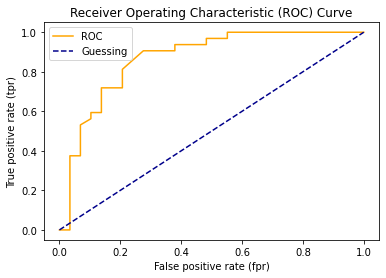

In [88]:
#need to plot it 
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the false positive rate (fpr) and true positive rate(tpr) of a model.
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plot line w/ no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [89]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

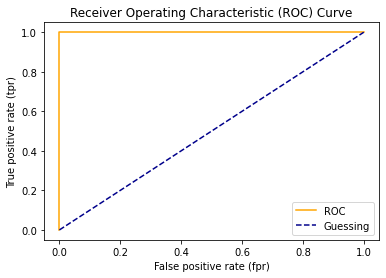

In [90]:
#plot perfect ROC curve & AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [91]:
#Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

Quick way to compare labels a model predicts and the actual labels it was supposed to predict

In [92]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [93]:
#visualize w. pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


8 & 5 are when it was wrong
24 & 24 when it was right

In [94]:
24+5+8+24 

61

In [95]:
len(X_test)

61

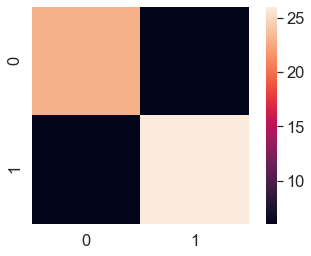

In [96]:
#Make our confusion Matrix more visual with Seaborn's heatmap

import seaborn as sns 

#set font scale
sns.set(font_scale=1.5)

#create matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it w. seaborn

sns.heatmap(conf_mat,square=True);


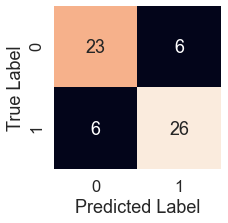

In [97]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #annotate the boxes w. conf_mat info
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label");
    
plot_conf_mat(conf_mat)

In [98]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix()

TypeError: plot_confusion_matrix() missing 3 required positional arguments: 'estimator', 'X', and 'y_true'

In [99]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.23.1.


Couldn't use confusion matrix function as we are on an older version of scikit learn 0.21 instead of .22


**Classification Report**

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [101]:
#Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only 1 positive case

disease_preds = np.zeros(10000) #model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Iceeh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In this case - you can see it fails at predicting the only 1, which means 0 precision, recall, etc.


### 4.2.2 Regression Model Evaluation 

model evaluation metrics documentation:
https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute Error (MAE)
3. Mean squared error (MSE)


**R^2**
Compares your model's predictions to the mean of the targets. 
Values can range from negative infinity to 1. 
If it just predicts mean of targets, R^2 will be 0.
Perfect prediction would be 1.

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train);

In [103]:
model.score(X_test, y_test)

0.8654448653350507

In [104]:
from sklearn.metrics import r2_score

#fill array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

21.488235294117654

In [105]:
r2_score(y_test, y_test_mean)
#essentially 0

2.220446049250313e-16

In [106]:
r2_score(y_test, y_test)
#perfect score as it's the same exact data

1.0

**Mean Absolute Error (MAE)**

Mean of all the absolute differences between the actual vs. predicted values.

*Take all the differences, absolute value, then find mean.*

In [107]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [108]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df['differences']=df["predicted values"]-df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


MAE is the average of the absolute differences here. Differences between actual vs. predictions.


**Mean Squared Error (MSE)**

In [109]:
#MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

MSE will always be higher than MAE. Squaring the errors of the differences


In [110]:
#calc by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.23 Finally using the `scoring` parameter

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf= RandomForestClassifier(n_estimators=100)


In [112]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [113]:
#cross-validated accuracy 
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is: 82.48%


In [114]:
#changing scoring method from "none" to "accuracy method"
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validated accuracy is: 82.48%


In [115]:
#trying precision measure to score
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [116]:
#Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [117]:
#f1 method of scoring
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#random seed makes it reproducible at different runs.
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [120]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [121]:
#Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

Why do we need "neg" in front of mean_absolute_error?

**From Documentation:**

All scorer objects follow the convention that **higher return values are better than lower return values**. Thus metrics which measure the distance between the model and the data, like `metrics.mean_squared_error`, are available as `neg_mean_squared_error` which return the negated value of the metric.

In [122]:
#mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using differnt evaluation metrics as Scikit-Learn Functions

**Classification evaluation functions**

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#random seed makes it reproducible at different runs.
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Make predictions
y_preds = clf.predict(X_test)

#Evaluate classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {recall_score(y_test, y_preds)}")


Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.875


In [124]:
len(y_preds)

61

**Regression evaluation functions**

In [125]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#random seed makes it reproducible at different runs.
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#make preds
y_preds = model.predict(X_test)

#evaluate
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


# Improve a Model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? (e.g. more depth on each sample (aka more features) as opposed to just more samples)

From a model perspective: 
* Is there a better model we can use? Maybe more complex - further down SciKit Learn diagram.
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.


In [126]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [127]:
#getting the HYPERPARAMETERS we can tweak on our model. 
clf.get_params()

#in documentation, they are called Parameters
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

Let's make 3 sets, training, validation and test.

In [128]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [129]:
def evaluate_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [130]:
#manually create train/test/split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#split into X&Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split the data into train, validation & test split
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [131]:
clf = RandomForestClassifier()

In [132]:
#enters with baseline parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [133]:
clf.fit(X_train, y_train)

#make baseline predictions
y_preds = clf.predict(X_valid)

#evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 Score: 0.85


(Didn't tweak n_estimators since new version of scikit has 100 as default)

Scikit-Learn has a built in hyperparameter tuning set called RandomizedSearch CV  (Aka Randomized Search Cross-Validation)


## 5.2 Hyperparameter tuning w. RandomizedSearchCV


In [134]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}

np.random.seed(42)

#split into x&y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs is how much CPU to use

#Setup RandomizedSearchCV
#this takes classifier, and distribution grid - searches over this grid 10 different times for different combinations
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,#pull our grid dictionary for what we want to run
                           n_iter=10, #number of models to try
                           cv=5, #5-fold cross-validation,
                           verbose=2)

# Fit the RandomizedSearchCV version of CLF
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.0s finished


In [135]:
#tell us what the best results are given our search.
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [136]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


For this example, Accuracy is not any better with RandomizedSearchCV, but it speeds up process of testing many models.

### 5.3 HyperParameter tuning with GridSearchCV

In [137]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [138]:
#size of grid #1 is huge if you consider all combinations
6*5*2*3*3*5

2700

In [139]:
grid_2 = {"n_estimators": [10, 200, 500],
       "max_depth": [None],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [6],
       "min_samples_leaf": [1,2]}

In [140]:
#total number of combos now.
#last *5 is because we're using cross-fold validation which is 5 chunks of data.

3*1*2*1*2*5


60

In [144]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

#split into x&y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs is how much CPU to use

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2, #pull our grid2
                           cv=5, #5-fold cross-validation,
                           verbose=2)

# Fit the RandomizedSearchCV version of CLF
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, mi

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.1s finished


In [145]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [146]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.82
F1 Score: 0.79


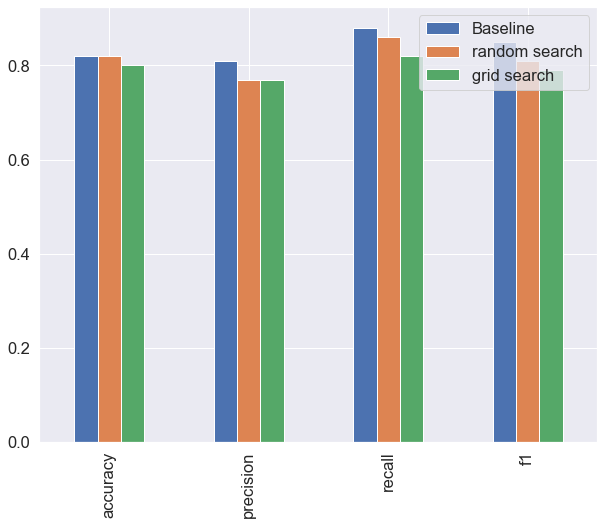

In [147]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                              # - skipped this one as already used n_estimators 100, didn't do a second baseline CLF
                                # "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [148]:
import pickle


# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb" #since we're writing a file "wb" = write binary
                        ))


In [149]:
#Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [150]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.82
F1 Score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

### Joblib
https://joblib.readthedocs.io/en/latest/ 

In [151]:
from joblib import dump, load

#save model to file 
dump(gs_clf, filename="gs_random_random_forest_model_1.joblib")

['gs_random_random_forest_model_1.joblib']

In [152]:
#import saved joblib model
loaded_joblib_model = load(filename="gs_random_random_forest_model_1.joblib")

In [153]:
#make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 80.33%
Precision: 0.77
Recall: 0.82
F1 Score: 0.79


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.82, 'f1': 0.79}

### Sometimes its better to use joblib for a fitted scikit-learn estimator.

https://scikit-learn.org/stable/modules/model_persistence.html

# 7. Putting it all together
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html


In [154]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [155]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [156]:
#any N/A ?
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [161]:
#getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#Import data & drop rows w. missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[ #pipeline takes steps one after another as a tuple
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
door_feature = ["Doors"]
door_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values, convert to numbers)
preprocessor = ColumnTransformer(
                transformers =[
                    ("cat", categorical_transformer, categorical_features),
                    ("door", door_transformer, door_feature),
                    ("num", numeric_transformer, num_features)
                ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

#split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [163]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], #the double underscore steps through preprocessor above -> into num
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.7s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [164]:
gs_model.score(X_test, y_test)

0.3339554263158365